In [2]:
%matplotlib inline


# Single Markov transition field

A Markov transition field is an image obtained from a time series, representing
a field of transition probabilities for a discretized time series.
Different strategies can be used to bin time series.
It is implemented as :class:`pyts.image.MarkovTransitionField`.

In this example, the considered time series is the sequence of the sine
function values for 1000 equally-spaced points in the interval
$[0, 4\pi]$.
One can see on the Markov transition field that the sine function is periodic
with period $2\pi$ and smooth (only neighbor bins have a positive
transition probability).

Since the API is designed for machine learning, the
:meth:`~pyts.image.MarkovTransitionField.transform` method of the
:class:`pyts.image.MarkovTransitionField` class expects a data set of time
series as input, so the time series is transformed into a data set with a
single time series (``X = np.array([x])``) and the first element of the data
set of Gramian angular fields is retrieved (``ax_mtf.imshow(X_mtf[0], ...``).


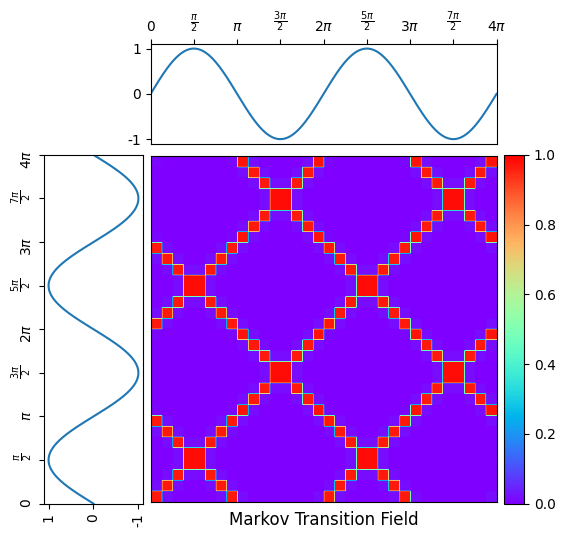

In [3]:
# Author: Johann Faouzi <johann.faouzi@gmail.com>
# License: BSD-3-Clause

import numpy as np
import matplotlib.pyplot as plt
from pyts.image import MarkovTransitionField


# Create a toy time series using the sine function
time_points = np.linspace(0, 4 * np.pi, 1000)
x = np.sin(time_points)
X = np.array([x])

# Compute Gramian angular fields
mtf = MarkovTransitionField(n_bins=8)
X_mtf = mtf.fit_transform(X)

# Plot the time series and its Markov transition field
width_ratios = (2, 7, 0.4)
height_ratios = (2, 7)
width = 6
height = width * sum(height_ratios) / sum(width_ratios)
fig = plt.figure(figsize=(width, height))
gs = fig.add_gridspec(2, 3,  width_ratios=width_ratios,
                      height_ratios=height_ratios,
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

# Define the ticks and their labels for both axes
time_ticks = np.linspace(0, 4 * np.pi, 9)
time_ticklabels = [r'$0$', r'$\frac{\pi}{2}$', r'$\pi$',
                   r'$\frac{3\pi}{2}$', r'$2\pi$', r'$\frac{5\pi}{2}$',
                   r'$3\pi$', r'$\frac{7\pi}{2}$', r'$4\pi$']
value_ticks = [-1, 0, 1]
reversed_value_ticks = value_ticks[::-1]

# Plot the time series on the left with inverted axes
ax_left = fig.add_subplot(gs[1, 0])
ax_left.plot(x, time_points)
ax_left.set_xticks(reversed_value_ticks)
ax_left.set_xticklabels(reversed_value_ticks, rotation=90)
ax_left.set_yticks(time_ticks)
ax_left.set_yticklabels(time_ticklabels, rotation=90)
ax_left.set_ylim((0, 4 * np.pi))
ax_left.invert_xaxis()

# Plot the time series on the top
ax_top = fig.add_subplot(gs[0, 1])
ax_top.plot(time_points, x)
ax_top.set_xticks(time_ticks)
ax_top.set_xticklabels(time_ticklabels)
ax_top.set_yticks(value_ticks)
ax_top.set_yticklabels(value_ticks)
ax_top.xaxis.tick_top()
ax_top.set_xlim((0, 4 * np.pi))
ax_top.set_yticklabels(value_ticks)

# Plot the Gramian angular fields on the bottom right
ax_mtf = fig.add_subplot(gs[1, 1])
im = ax_mtf.imshow(X_mtf[0], cmap='rainbow', origin='lower', vmin=0., vmax=1.,
                   extent=[0, 4 * np.pi, 0, 4 * np.pi])
ax_mtf.set_xticks([])
ax_mtf.set_yticks([])
ax_mtf.set_title('Markov Transition Field', y=-0.09)

# Add colorbar
ax_cbar = fig.add_subplot(gs[1, 2])
fig.colorbar(im, cax=ax_cbar)

plt.show()